# XGBoost for business

### Load data

In [1]:
#import libraries
import pandas as pd
import xgboost as xgb
import numpy as np

In [3]:
#importing dataset
dataset = pd.read_csv("bank-full.csv", sep = ";")
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
#isolate the x and y variables
y = dataset.iloc[:, -1].values
X = dataset._get_numeric_data()

In [11]:
round(dataset.describe(), 2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [13]:
print("X" , len(X))
print("y" , len(y))

X 45211
y 45211


In [15]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1502)

In [17]:
print("X_train :" , len(X_train))
print("X_tests :" , len(X_test))
print("y_train :" , len(y_train))
print("y_tests :" , len(y_test))

X_train : 36168
X_tests : 9043
y_train : 36168
y_tests : 9043


In [19]:
#transform y factor variables
y_train = np.where(y_train == "yes", 1, 0)
y_test = np.where(y_test == "yes", 1, 0)

In [21]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [25]:
print("mean y_train :" , np.mean(y_train))
print("mean y_test  :" , np.mean(y_test))

mean y_train : 0.11579296615792967
mean y_test  : 0.12175163109587527


In [27]:
#create xgboost matrices
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

In [29]:
#set the parameters
parameters1 = {'learning_rate': 0.3,
               'max_depth': 2,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

In [31]:
#run XGBoost
model1 = xgb.train(params = parameters1,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.75049
[50]	Yes-auc:0.87633
[100]	Yes-auc:0.88087
[150]	Yes-auc:0.88275
[199]	Yes-auc:0.88375


In [33]:
#Predictions
predictions1 = model1.predict(Test)
predictions1 = np.where(predictions1 > 0.5, 1, 0)

In [35]:
#Confusion MAtrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix1 = confusion_matrix(y_test, predictions1)
print(confusion_matrix1)
report1 = classification_report(y_test, predictions1)
print(report1)

[[7690  252]
 [ 736  365]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7942
           1       0.59      0.33      0.42      1101

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



In [63]:
confusion_matrix(y_test, predictions1)

array([[7690,  252],
       [ 736,  365]])

In [65]:
#isolate the categorical variables
dataset_categorical = dataset.select_dtypes(exclude = "number")

In [67]:
dataset_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [69]:
#tranform categorical variables into dummy variables
dataset_categorical = pd.get_dummies(data = dataset_categorical,
                                     ##dtype=float, # default boolean
                                     drop_first = True)

In [71]:
dataset_categorical.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [73]:
type(X)

pandas.core.frame.DataFrame

In [75]:
type(dataset_categorical)

pandas.core.frame.DataFrame

In [77]:
#joining numerical and categorical datasets
final_dataset = pd.concat([X, dataset_categorical], axis = 1)

In [79]:
final_dataset

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,True,False,False,False,True,False,True
45209,57,668,17,508,4,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [85]:
final_dataset.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
job_unknown             bool
marital_married         bool
marital_single          bool
education_secondary     bool
education_tertiary      bool
education_unknown       bool
default_yes             bool
housing_yes             bool
loan_yes                bool
contact_telephone       bool
contact_unknown         bool
month_aug               bool
month_dec               bool
month_feb               bool
month_jan               bool
month_jul               bool
month_jun               bool
month_mar     

In [87]:
#getting names of columns
feature_columns = list(final_dataset.columns.values)
feature_columns = feature_columns[:-1]

In [89]:
feature_columns

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

### Model 2

In [92]:
#isolate the x and y variables part 2
y = final_dataset.iloc[:, -1].values
X = final_dataset.iloc[:, :-1].values

In [94]:
#split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2,
                                                    random_state=1502)

In [96]:
print("X_train :" , len(X_train))
print("X_tests :" , len(X_test))
print("y_train :" , len(y_train))
print("y_tests :" , len(y_test))

X_train : 36168
X_tests : 9043
y_train : 36168
y_tests : 9043


In [98]:
X

array([[58, 2143, 5, ..., False, False, True],
       [44, 29, 5, ..., False, False, True],
       [33, 2, 5, ..., False, False, True],
       ...,
       [72, 5715, 17, ..., False, True, False],
       [57, 668, 17, ..., False, False, True],
       [37, 2971, 17, ..., True, False, False]], dtype=object)

In [100]:
#create xgboost matrices part 2
Train = xgb.DMatrix(X_train, label = y_train, feature_names = feature_columns)
Test = xgb.DMatrix(X_test, label = y_test, feature_names = feature_columns)

In [102]:
#set the parameters part 2
parameters2 = {'learning_rate': 0.3,
               'max_depth': 2,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

In [104]:
#run XGBoost
model2 = xgb.train(params = parameters2,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.74351
[50]	Yes-auc:0.91916
[100]	Yes-auc:0.92513
[150]	Yes-auc:0.92809
[199]	Yes-auc:0.92905


In [106]:
#Predictions part 2
predictions2 = model2.predict(Test)
predictions2 = np.where(predictions2 > 0.5, 1, 0)

In [110]:
#Confusion Matrix
confusion_matrix2 = confusion_matrix(y_test, predictions2)
print(confusion_matrix2)

[[7676  266]
 [ 628  473]]


In [112]:
report2 = classification_report(y_test, predictions2)
print(report2)

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      7942
        True       0.64      0.43      0.51      1101

    accuracy                           0.90      9043
   macro avg       0.78      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043



Parallel processing

In [114]:
#checking how many cores we have
import multiprocessing
multiprocessing.cpu_count()

8

In [116]:
#setting the cross validation parameters
from sklearn.model_selection import KFold
tune_control = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 1502).split(X = X_train,
                                                y = y_train)

In [118]:
#set parameter tuning
#set the parameters part 2
tune_grid = {'learning_rate': [0.05, 0.3],
               'max_depth': range(2, 9, 2),
               'colsample_bytree': [0.5, 1],
               'subsample': [1],
               'min_child_weight': [1],
               'gamma': [0], 
               'random_state': [1502],
               'n_estimators': range(200, 2000, 200),
               'booster': ["gbtree"]}

In [120]:
#State that we are doing a classification problem
from xgboost import XGBClassifier
classifier = XGBClassifier(objective = "binary:logistic")

In [122]:
#Cross Validation Assembly
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid,
                            scoring = "roc_auc",
                            n_jobs = 6,
                            cv = tune_control,
                            verbose = 5)

In [124]:
#Setting evaluation parameters
evaluation_parameters = {"early_stopping_rounds": 100,
                         "eval_metric": "auc",
                         "eval_set": [(X_test, y_test)]}

In [ ]:
#Hyperparameter tuning and cross validation
tune_model = grid_search.fit(X = X_train,
                             y = y_train,
                             **evaluation_parameters)
grid_search.best_params_, grid_search.best_score_

## err

Parameter Tuning Round 2

In [128]:
# Set the parameter tuning part 2
tune_grid2 = {'learning_rate': [0.05],
               'max_depth': [6],
               'colsample_bytree': [0.5],
               'subsample': [0.9, 1],
               'min_child_weight': range(1,5,1),
               'gamma': [0, 0.01], 
               'random_state': [1502],
               'n_estimators': range(200, 2000, 200),
               'booster': ["gbtree"]}

In [130]:
#Cross Validation Assembly
from sklearn.model_selection import GridSearchCV
grid_search2 = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid2,
                            scoring = "roc_auc",
                            n_jobs = 6,
                            cv = tune_control,
                            verbose = 5)

In [ ]:
#Hyperparameter tuning and cross validation
tune_model2 = grid_search2.fit(X = X_train,
                             y = y_train,
                             **evaluation_parameters)
grid_search2.best_params_, grid_search2.best_score_


## Final XGBoost Model

In [132]:
#set the parameters part 3
parameters3 = {'learning_rate': 0.05,
               'max_depth': 6,
               'colsample_bytree': 0.5,
               'subsample': 1,
               'min_child_weight': 2,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

In [134]:
#run XGBoost part 3
model3 = xgb.train(params = parameters3,
                   dtrain = Train,
                   num_boost_round = 800,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.74004
[50]	Yes-auc:0.92092
[100]	Yes-auc:0.92686
[150]	Yes-auc:0.93009
[200]	Yes-auc:0.93126
[250]	Yes-auc:0.93192
[300]	Yes-auc:0.93218
[350]	Yes-auc:0.93243
[400]	Yes-auc:0.93241
[450]	Yes-auc:0.93233
[500]	Yes-auc:0.93245
[550]	Yes-auc:0.93242
[600]	Yes-auc:0.93228
[650]	Yes-auc:0.93221
[700]	Yes-auc:0.93212
[750]	Yes-auc:0.93205
[799]	Yes-auc:0.93175


In [136]:
#Predictions part 3
predictions3 = model3.predict(Test)
print(len(predictions3))
predictions3 = np.where(predictions3 > 0.5, 1, 0)
print(len(predictions3))


9043
9043


In [140]:
#Confusion Matrix
confusion_matrix3 = confusion_matrix(y_test, predictions3)
print(confusion_matrix3)

[[7628  314]
 [ 577  524]]


In [142]:
report3 = classification_report(y_test, predictions3)
print(report3)

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      7942
        True       0.63      0.48      0.54      1101

    accuracy                           0.90      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

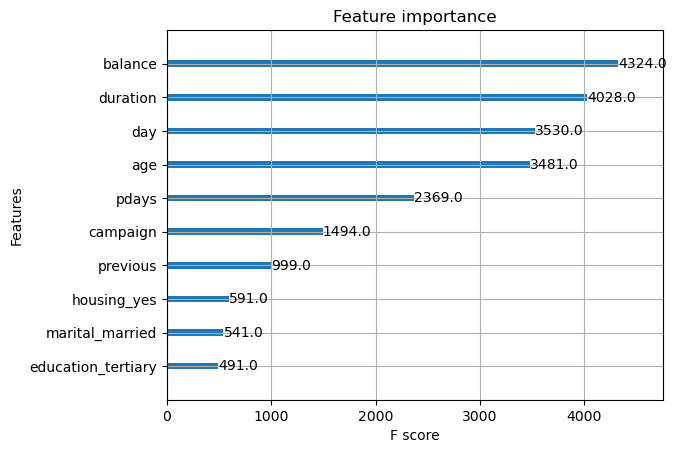

In [144]:
#plot importances
xgb.plot_importance(model3, max_num_features = 10)

## SHAP

In [147]:
#Preparing SHAP
#pip install shap
#conda install -c conda-forge shap
import shap
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_test)

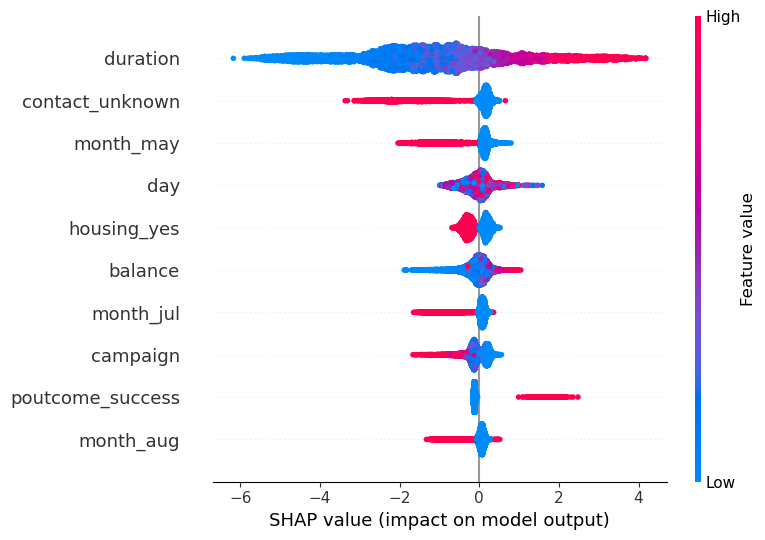

In [149]:
#shap plotting
shap.summary_plot(shap_values,
                  X_test,
                  feature_names = feature_columns,
                  max_display = 10)
